#
## 1. Data Preparation
## Define the dataset.
- x: Independent variable (features).
- y: Dependent variable (target values we want to predict).
- dtype=np.float32: Ensures compatibility with TensorFlow.

#
## 1. Data Preparation
## Define the dataset.
- x: Independent variable (features).
- y: Dependent variable (target values we want to predict).
- dtype=np.float32: Ensures compatibility with TensorFlow.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Features (input) and targets (output)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float32)  # Input data
y = np.array([2, 5, 6, 7, 9, 11, 12, 14, 16, 18], dtype=np.float32)  # True outputs

#
## 2. Model Parameters (Weights) Initialization
## Start with random values for the model parameters.
- w (weight): Controls how much x influences the prediction.
- b (bias): Adjusts the baseline prediction.
- tf.Variable: TensorFlow variable (trainable parameter).
- ''* 0.01: Small initial values help training stability.

In [2]:
# Initialize weight (slope) and bias (intercept) randomly
w = tf.Variable(np.random.randn() * 0.01, dtype=tf.float32)  # Slope
b = tf.Variable(np.random.randn() * 0.01, dtype=tf.float32)  # Intercept

#
## 3. Define the Linear Regression Model
- Purpose: Computes predictions using the current w and b.
- Formula: Simple linear equation (y = mx + c).
- features: Input data (x values).

In [3]:
def linear_regression(features):
    return w * features + b  # y = w*x + b

#
## 4. Define the Loss Function (Mean Squared Error)
- Purpose: Measures how wrong the predictions are.
- MSE (Mean Squared Error):
- Computes the average squared difference between predictions (ŷ) and true values (y).
- Lower MSE = better model.

In [4]:
def compute_loss():
    predictions = linear_regression(x)  # Get predicted y-values
    return tf.keras.losses.mse(y, predictions)  # Mean Squared Error

#
## 5. Optimizer Setup (Adam)
- Purpose: Adjusts w and b to minimize loss.
- Adam Optimizer:
    - An adaptive learning rate method (better than plain Gradient Descent).
    - learning_rate=0.01: Controls step size during updates (can be tuned).

In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

#
## 6. Training Loop (Gradient Descent)
- Purpose: Repeatedly adjust w and b to minimize loss.
- Key Steps:
    1. GradientTape: Records operations for automatic differentiation.
    2. tape.gradient(): Computes gradients of loss w.r.t. w and b.
    3. apply_gradients: Updates w and b using Adam.
    4. Early Stopping: Stops training if loss improvement is too small.

In [6]:
prev_loss = float('inf')  # Track previous loss for early stopping

for j in range(10000):  # Run for max 10,000 iterations
    with tf.GradientTape() as tape:
        loss = compute_loss()  # Compute current loss
    
    # Compute gradients (how to adjust w and b to reduce loss)
    gradients = tape.gradient(loss, [w, b])
    
    # Update w and b using the optimizer
    opt.apply_gradients(zip(gradients, [w, b]))
    
    # Print progress every 1000 steps
    if j % 1000 == 0:
        print(f"Iteration {j}, Loss: {loss.numpy():.6f}")
    
    # Early stopping if loss stops improving
    if abs(prev_loss - loss) < 1e-6:
        print(f"Early stopping at iteration {j}")
        break
    prev_loss = loss

Iteration 0, Loss: 122.187134
Iteration 1000, Loss: 0.227874
Iteration 2000, Loss: 0.183313
Early stopping at iteration 2556


#
## 7. Results & Prediction
- Purpose: Evaluate the trained model.
- Output:
    - Final w and b: Optimal learned parameters.
    - Final loss: How well the model fits the data.
    - Prediction for x_new = 11: Expected output ≈ 19.18.

In [7]:
# Final trained parameters
print(f"\nFinal parameters: w={w.numpy():.6f}, b={b.numpy():.6f}")
print(f"Final loss: {loss.numpy():.6f}")

# Predict a new value (x = 11)
x_new = 11.0
y_new = linear_regression(x_new)  # Use the trained model
print(f"Prediction for x = {x_new}: {y_new.numpy():.4f}")


Final parameters: w=1.680170, b=0.764974
Final loss: 0.180823
Prediction for x = 11.0: 19.2468


#
## 8. Visualizations to Enhance Linear Regression

## Shows the best-fit line after training

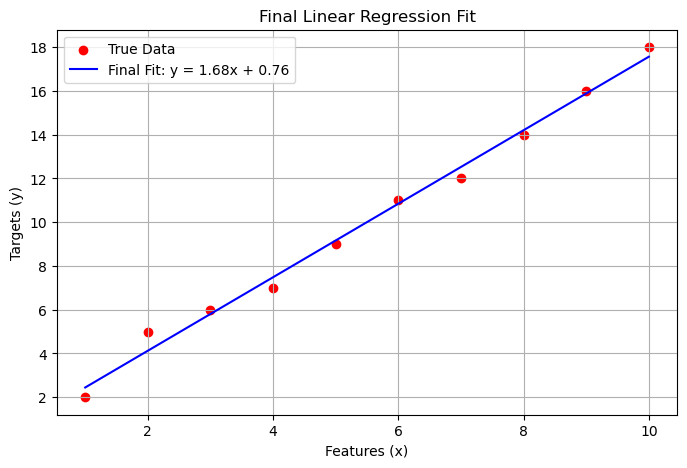

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(x, y, c='red', label='True Data')
plt.plot(x, linear_regression(x), 'b-', 
         label=f'Final Fit: y = {w.numpy():.2f}x + {b.numpy():.2f}')
plt.title("Final Linear Regression Fit")
plt.xlabel("Features (x)")
plt.ylabel("Targets (y)")
plt.grid(True)
plt.legend()
plt.show()

### Advanced visualization showing how loss changes with w and b

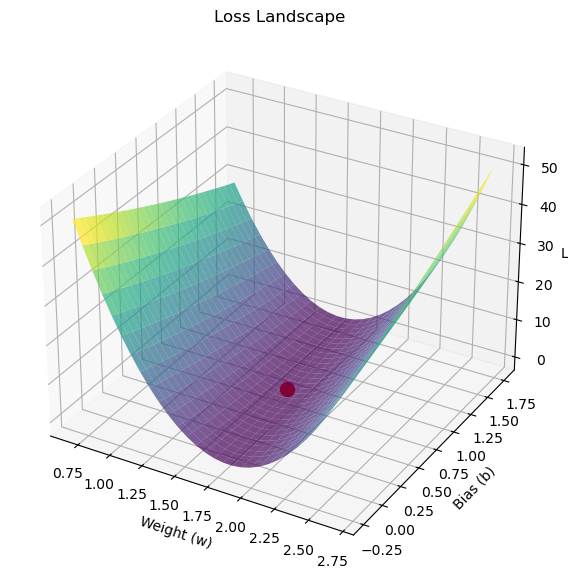

In [11]:
from mpl_toolkits.mplot3d import Axes3D

# Generate grid of w and b values
w_vals = np.linspace(w.numpy()-1, w.numpy()+1, 30)
b_vals = np.linspace(b.numpy()-1, b.numpy()+1, 30)
W, B = np.meshgrid(w_vals, b_vals)
losses = np.array([tf.keras.losses.mse(y, w*x + b) for w,b in zip(W.ravel(), B.ravel())])
losses = losses.reshape(W.shape)

# Plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, losses, cmap='viridis', alpha=0.7)
ax.scatter([w.numpy()], [b.numpy()], [loss.numpy()], c='red', s=100)
ax.set_title("Loss Landscape")
ax.set_xlabel("Weight (w)")
ax.set_ylabel("Bias (b)")
ax.set_zlabel("Loss")
plt.show()